In [19]:
print("Reproducing and expanding case study of Shvartser posted at Dr. Brownlee's machinelearningmastery.com")

Reproducing and expanding case study of Shvartser posted at Dr. Brownlee's machinelearningmastery.com


In [23]:
# preproc imports
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import preprocessing as preproc
import numpy
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

In [25]:
# algo eval imports
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [26]:
# fine tuning
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# significance tests
import scipy.stats as stats
import math

# build and save model using Pickle
from random import *
import pickle

In [27]:
# final model
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [28]:
datafile="./diabetes.data"
headers=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataset=pandas.read_csv(datafile, names=headers)

In [29]:
print(" = 3. Summarize the Dataset = ")
# shape
print(" == 3.1 Dimensions of Dataset, shape of data == ")
print(dataset.shape)

 = 3. Summarize the Dataset = 
 == 3.1 Dimensions of Dataset, shape of data == 
(768, 9)


In [30]:
# head
print(" == 3.2 Peek at the Data, head -- first 10 items == ")
print(dataset.head(10))

 == 3.2 Peek at the Data, head -- first 10 items == 
   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1
5     5   116    74     0     0  25.6  0.201   30      0
6     3    78    50    32    88  31.0  0.248   26      1
7    10   115     0     0     0  35.3  0.134   29      0
8     2   197    70    45   543  30.5  0.158   53      1
9     8   125    96     0     0   0.0  0.232   54      1


In [31]:
# data types
print(" == 3.a data types for each attributes == ")
print(dataset.dtypes)

 == 3.a data types for each attributes == 
preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object


In [32]:
# descriptions
print(" == 3.3 Statistical Summary == ")
print(dataset.describe())

 == 3.3 Statistical Summary == 
             preg        plas        pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750 

In [33]:
# class distribution
print(" == 3.4 class distribution  ==")
print(dataset.groupby('class').size())

 == 3.4 class distribution  ==
class
0    500
1    268
dtype: int64


 = 4. Data Visualization = 
 == 4.1 Univariate Plots: box and whisker plots. why? to determine outliers? = 


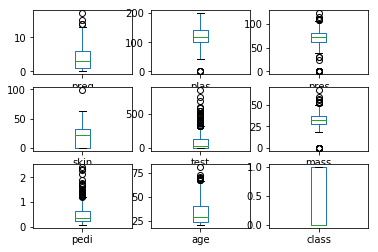

In [34]:
print(" = 4. Data Visualization = ")
# box and whisker plots
print(" == 4.1 Univariate Plots: box and whisker plots. why? to determine outliers? = ")
dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

 == 4.1 Univariate Plots: histograms. why? to determine if the distribution is normal-like? == 


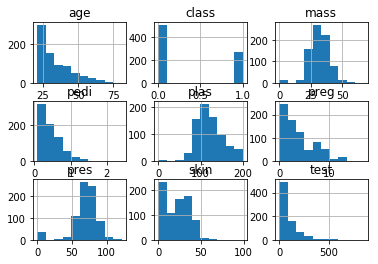

In [35]:
# histograms
print(" == 4.1 Univariate Plots: histograms. why? to determine if the distribution is normal-like? == ")
dataset.hist()
plt.show()

== 4.2 Multivariate Plots: Multivariate Plots:scatter plot matrix. why? to spot structured relationships between input variables ==


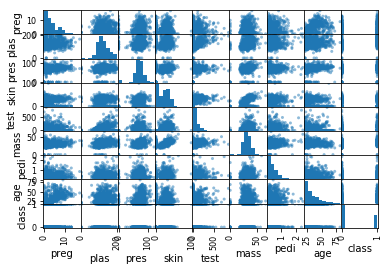

In [36]:
# scatter plot matrix
print("== 4.2 Multivariate Plots: Multivariate Plots:scatter plot matrix. why? to spot structured relationships between input variables ==")
scatter_matrix(dataset)
plt.show()

In [37]:
numpy.set_printoptions(precision=3)
array = numpy.array(dataset.values)

In [38]:
print("== 4.a Generating data sets ==")

print("diabetes_attr: unchanged, original attributes")
diabetes_attr = array[:,0:8]
label = array[:,8] #unchanged across preprocessing?
diabetes_df = pandas.DataFrame(diabetes_attr)

== 4.a Generating data sets ==
diabetes_attr: unchanged, original attributes


In [39]:
print("normalized_attr: range of 0 to 1")
scaler = preproc.MinMaxScaler().fit(diabetes_attr)
normalized_attr = scaler.transform(diabetes_attr)
normalized_df = pandas.DataFrame(normalized_attr)
print(normalized_df.describe())

normalized_attr: range of 0 to 1
                0           1           2           3           4           5  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     0.226180    0.607510    0.566438    0.207439    0.094326    0.476790   
std      0.198210    0.160666    0.158654    0.161134    0.136222    0.117499   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.058824    0.497487    0.508197    0.000000    0.000000    0.406855   
50%      0.176471    0.587940    0.590164    0.232323    0.036052    0.476900   
75%      0.352941    0.704774    0.655738    0.323232    0.150414    0.545455   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                6           7  
count  768.000000  768.000000  
mean     0.168179    0.204015  
std      0.141473    0.196004  
min      0.000000    0.000000  
25%      0.070773    0.050000  
50%      0.125747    0.133333  
75%      0.23

In [40]:
print("standardized_attr: mean of 0 and stdev of 1")
#scaler = preproc.StandardScaler().fit(diabetes_attr)
#standardized_attr = scaler.transform(diabetes_attr)
standardized_attr = preproc.scale(diabetes_attr)
standardized_df = pandas.DataFrame(standardized_attr)
print(standardized_df.describe())

standardized_attr: mean of 0 and stdev of 1
                  0             1             2             3             4  \
count  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02   
mean  -6.476301e-17 -9.251859e-18  1.503427e-17  1.006140e-16 -3.006854e-17   
std    1.000652e+00  1.000652e+00  1.000652e+00  1.000652e+00  1.000652e+00   
min   -1.141852e+00 -3.783654e+00 -3.572597e+00 -1.288212e+00 -6.928906e-01   
25%   -8.448851e-01 -6.852363e-01 -3.673367e-01 -1.288212e+00 -6.928906e-01   
50%   -2.509521e-01 -1.218877e-01  1.496408e-01  1.545332e-01 -4.280622e-01   
75%    6.399473e-01  6.057709e-01  5.632228e-01  7.190857e-01  4.120079e-01   
max    3.906578e+00  2.444478e+00  2.734528e+00  4.921866e+00  6.652839e+00   

                  5             6             7  
count  7.680000e+02  7.680000e+02  7.680000e+02  
mean   2.590520e-16  2.451743e-16  1.931325e-16  
std    1.000652e+00  1.000652e+00  1.000652e+00  
min   -4.060474e+00 -1.189553e+00 -1.041549e

In [41]:
print("== 4.b treating missing values by purging or imputating ==")
## missing.arff
print("=== Assuming, zero indicates missing values === ")
print("missing values by count")
print((dataset[['plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']] == 0).sum())
print("=== purging ===")
# make a copy of original data set
dataset_cp = dataset.copy(deep=True)

== 4.b treating missing values by purging or imputating ==
=== Assuming, zero indicates missing values === 
missing values by count
plas      5
pres     35
skin    227
test    374
mass     11
pedi      0
age       0
dtype: int64
=== purging ===


In [42]:
dataset_cp[['plas', 'pres', 'skin', 'test', 'mass']] = dataset_cp[['plas', 'pres', 'skin', 'test', 'mass']].replace(0, numpy.NaN)

In [43]:
# print the first 10 rows of data
print(dataset_cp.head(10))

# count the number of NaN values in each column
print(dataset_cp.isnull().sum())

   preg   plas  pres  skin   test  mass   pedi  age  class
0     6  148.0  72.0  35.0    NaN  33.6  0.627   50      1
1     1   85.0  66.0  29.0    NaN  26.6  0.351   31      0
2     8  183.0  64.0   NaN    NaN  23.3  0.672   32      1
3     1   89.0  66.0  23.0   94.0  28.1  0.167   21      0
4     0  137.0  40.0  35.0  168.0  43.1  2.288   33      1
5     5  116.0  74.0   NaN    NaN  25.6  0.201   30      0
6     3   78.0  50.0  32.0   88.0  31.0  0.248   26      1
7    10  115.0   NaN   NaN    NaN  35.3  0.134   29      0
8     2  197.0  70.0  45.0  543.0  30.5  0.158   53      1
9     8  125.0  96.0   NaN    NaN   NaN  0.232   54      1
preg       0
plas       5
pres      35
skin     227
test     374
mass      11
pedi       0
age        0
class      0
dtype: int64


In [44]:
# dataset with missing values
dataset_missing = dataset_cp.dropna()

# summarize the number of rows and columns in the dataset
print(dataset_cp.shape)

missing_attr = numpy.array(dataset_missing.values[:,0:8])
missing_label = numpy.array(dataset_missing.values[:,8])

(768, 9)


In [45]:
print("=== imputing by replacing missing values with mean column values ===")

dataset_impute = dataset_cp.fillna(dataset_cp.mean())
# count the number of NaN values in each column
print(dataset_impute.isnull().sum())

print("== 4.c addressing class imbalance under or over sampling ==")

impute_attr = numpy.array(dataset_impute.values[:,0:8])

=== imputing by replacing missing values with mean column values ===
preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64
== 4.c addressing class imbalance under or over sampling ==


In [46]:
print("=== undersampling majority class by purging ===")

# Separate majority and minority classes
df_majority = dataset[dataset['class']==0]
df_minority = dataset[dataset['class']==1]

=== undersampling majority class by purging ===


In [47]:
print("df_minority['class'].size", df_minority['class'].size)

# Downsample majority class

df_majority_downsampled = resample(df_majority, 
                          replace=False,    # sample without replacement
                          n_samples=df_minority['class'].size,  # match minority class
                          random_state=7) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pandas.concat([df_majority_downsampled, df_minority])

df_minority['class'].size 268


In [48]:
print("undersampled", df_downsampled.groupby('class').size()) 
df_downsampled=df_downsampled.sample(frac=1).reset_index(drop=True)
undersampling_attr = numpy.array(df_downsampled.values[:,0:8])
undersampling_label = numpy.array(df_downsampled.values[:,8])

undersampled class
0    268
1    268
dtype: int64


In [50]:
print("=== oversampling minority class with SMOTE ===")

sm = SMOTE(random_state=7)
x_val = dataset.values[:,0:8]
y_val = dataset.values[:,8]
X_res, y_res = sm.fit_sample(x_val, y_val)

features=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
oversampled_df = pandas.DataFrame(X_res)
oversampled_df.columns = features
oversampled_df = oversampled_df.assign(label = numpy.asarray(y_res))
oversampled_df = oversampled_df.sample(frac=1).reset_index(drop=True)

oversampling_attr = oversampled_df.values[:,0:8]
oversampling_label = oversampled_df.values[:,8]
print("oversampled_df", oversampled_df.groupby('label').size()) 

=== oversampling minority class with SMOTE ===
oversampled_df label
0.0    500
1.0    500
dtype: int64


In [51]:
print(" = 5. Evaluate Some Algorithms = ")
# Split-out validation dataset
print(" == 5.1 Create a Validation Dataset: Split-out validation dataset == ")

# Test options and evaluation metric
print(" == 5.2 Test Harness: Test options and evaluation metric == ")
seed = 7
scoring = 'accuracy'

 = 5. Evaluate Some Algorithms = 
 == 5.1 Create a Validation Dataset: Split-out validation dataset == 
 == 5.2 Test Harness: Test options and evaluation metric == 


== 5.3 Build Models: build and evaluate our five models, Spot Check Algorithms ==
eval metric: accuracy
= diabetes_attr = 
algorithm,mean,std,signficance,p-val
LR: 0.769515 (0.048411) False nan
LDA: 0.773462 (0.051592) False 0.556685
KNN: 0.726555 (0.061821) True 0.008090
CART: 0.697830 (0.055250) True 0.000061
NB: 0.755178 (0.042766) False 0.153974
RF: 0.743438 (0.072526) False 0.092198
SVM: 0.651025 (0.072141) True 0.000048
 == 5.4 Select Best Model, Compare Algorithms == 


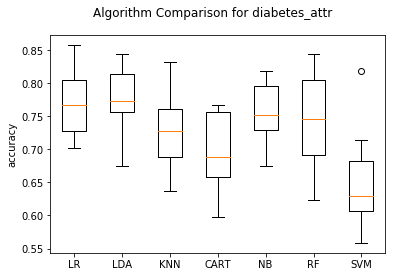

= normalized_attr = 
algorithm,mean,std,signficance,p-val
LR: 0.761740 (0.052185) False nan
LDA: 0.773462 (0.051592) True 0.029369
KNN: 0.744754 (0.060567) False 0.219454
CART: 0.691302 (0.065263) True 0.000393
NB: 0.755178 (0.042766) False 0.481693
RF: 0.749897 (0.076063) False 0.445903
SVM: 0.763004 (0.056922) False 0.803644
 == 5.4 Select Best Model, Compare Algorithms == 


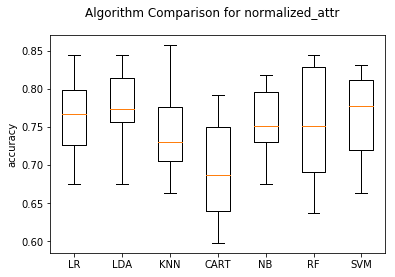

= standardized_attr = 
algorithm,mean,std,signficance,p-val
LR: 0.779956 (0.050088) False nan
LDA: 0.773462 (0.051592) False 0.138185
KNN: 0.742139 (0.071500) True 0.039198
CART: 0.690003 (0.059169) True 0.000037
NB: 0.755178 (0.042766) True 0.003418
RF: 0.742157 (0.068535) True 0.005308
SVM: 0.764286 (0.056962) False 0.051041
 == 5.4 Select Best Model, Compare Algorithms == 


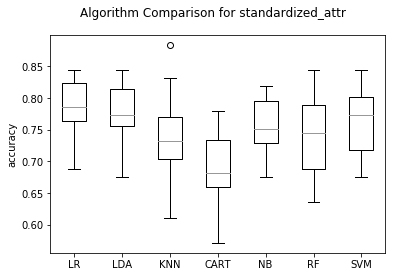

= impute_attr = 
algorithm,mean,std,signficance,p-val
LR: 0.764337 (0.047320) False nan
LDA: 0.766951 (0.052975) False 0.640480
KNN: 0.713534 (0.064980) True 0.014492
CART: 0.688688 (0.061737) True 0.001643
NB: 0.747386 (0.043583) False 0.220344
RF: 0.756425 (0.072171) False 0.640486
SVM: 0.651025 (0.072141) True 0.000570
 == 5.4 Select Best Model, Compare Algorithms == 


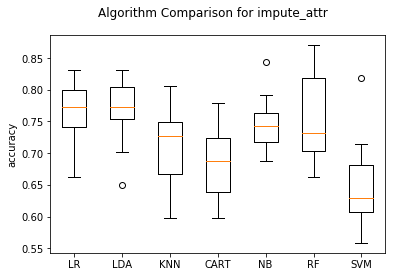

= missing_attr = 
algorithm,mean,std,signficance,p-val
LR: 0.762500 (0.092905) False nan
LDA: 0.788077 (0.094197) False 0.118110
KNN: 0.714295 (0.090356) True 0.009626
CART: 0.735192 (0.099323) False 0.461723
NB: 0.775256 (0.067309) False 0.465077
RF: 0.767949 (0.095253) False 0.770376
SVM: 0.668462 (0.085965) True 0.009042
 == 5.4 Select Best Model, Compare Algorithms == 


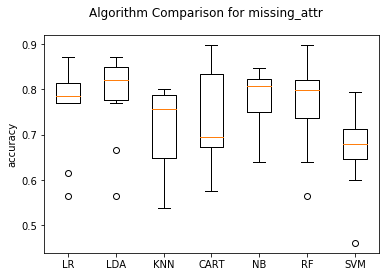

= undersampling_attr = 
algorithm,mean,std,signficance,p-val
LR: 0.751817 (0.060096) False nan
LDA: 0.751817 (0.072252) False 1.000000
KNN: 0.691999 (0.076429) True 0.000707
CART: 0.681097 (0.070529) True 0.025048
NB: 0.727324 (0.059279) False 0.081549
RF: 0.708665 (0.061378) False 0.088255
SVM: 0.466247 (0.036003) True 0.000000
 == 5.4 Select Best Model, Compare Algorithms == 


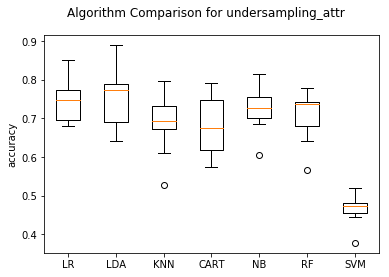

= oversampling_attr = 
algorithm,mean,std,signficance,p-val
LR: 0.751000 (0.043463) False nan
LDA: 0.747000 (0.035228) False 0.462036
KNN: 0.725000 (0.025000) True 0.029011
CART: 0.763000 (0.027946) False 0.508646
NB: 0.736000 (0.023324) False 0.237566
RF: 0.794000 (0.025768) True 0.041315
SVM: 0.677000 (0.032879) True 0.001044
 == 5.4 Select Best Model, Compare Algorithms == 


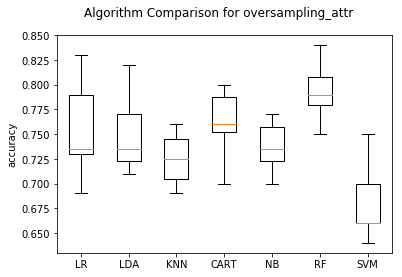

In [52]:
# Spot Check Algorithms
print("== 5.3 Build Models: build and evaluate our five models, Spot Check Algorithms ==")
datasets = []
datasets.append(('diabetes_attr', diabetes_attr, label))
datasets.append(('normalized_attr', normalized_attr, label))
datasets.append(('standardized_attr', standardized_attr, label))
datasets.append(('impute_attr', impute_attr, label))
datasets.append(('missing_attr', missing_attr, missing_label))
datasets.append(('undersampling_attr', undersampling_attr, undersampling_label))
datasets.append(('oversampling_attr', oversampling_attr, oversampling_label))

models = []
models.append(('LR', LogisticRegression())) # based on imbalanced datasets and default parameters
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC()))

print("eval metric: " + scoring)
for dataname, attributes, target in datasets:
	# evaluate each model in turn
	results = []
	names = []
	print("= " + dataname + " = ")
	print("algorithm,mean,std,signficance,p-val")
	for name, model in models:
		kfold = model_selection.KFold(n_splits=10, random_state=seed)
		cv_results = model_selection.cross_val_score(model, attributes, target, cv=kfold, scoring=scoring)
		results.append(cv_results)
		#print("cv_results")
		#print(cv_results)
		names.append(name)
		
		t, prob = stats.ttest_rel(a= cv_results,b= results[0])
		#print("LR vs ", name, t,prob)
		# Below 0.05, significant. Over 0.05, not significant. 
		# http://blog.minitab.com/blog/understanding-statistics/what-can-you-say-when-your-p-value-is-greater-than-005
		statistically_different = (prob < 0.05)
		
		msg = "%s: %f (%f) %s %f" % (name, cv_results.mean(), cv_results.std(), statistically_different, prob)
		print(msg)

	# Compare Algorithms
	print(" == 5.4 Select Best Model, Compare Algorithms == ")
	fig = plt.figure()
	fig.suptitle('Algorithm Comparison for ' + dataname)
	ax = fig.add_subplot(111) # what does 111 mean?
	plt.boxplot(results)
	plt.ylabel(scoring)
	ax.set_xticklabels(names)
	plt.show()

In [53]:
test_size = 0.33
X_train, X_test, Y_train, Y_test = train_test_split(diabetes_attr, label, test_size=test_size,
random_state=seed)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l2','l1']}
logr = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, scoring='accuracy')
logr.fit(X_train, Y_train)
print("logr.best_score=",logr.best_score_)
print("logr.best_estimator_.C=",logr.best_estimator_.C)
print("logr.best_estimator_.penalty=",logr.best_estimator_.penalty)

logr.best_score= 0.7490272373540856
logr.best_estimator_.C= 1
logr.best_estimator_.penalty= l1


In [54]:
#building model for baseline
model = LogisticRegression(class_weight='balanced')
y_score = model.fit(diabetes_attr, label)
result = model.score(X_test, Y_test) # determine r2 value
print("baseline accuracy on X_test without grid search=",result)

baseline accuracy on X_test without grid search= 0.7559055118110236


In [55]:
#building model with grid search selected parameters
model = LogisticRegression(class_weight='balanced',C=logr.best_estimator_.C, penalty=logr.best_estimator_.penalty)
y_score = model.fit(diabetes_attr, label)
result = model.score(X_test, Y_test) # determine r2 value
print("accuracy with grid search selected C and penalty_model, and before storing to disk", result)

accuracy with grid search selected C and penalty_model, and before storing to disk 0.7559055118110236


In [56]:
# save the model to disk
filename = 'diabetes_py_model.sav' 
pickle.dump(model, open(filename, 'wb'))
# some time later...
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb')) 
result = loaded_model.score(X_test, Y_test)

print("accuracy on X_test after loading from disk=",result)

accuracy on X_test after loading from disk= 0.7559055118110236


In [59]:
delta0_predictions=loaded_model.predict(X_test)
print("delta0_predictions")
print("accuracy_score=",accuracy_score(Y_test, delta0_predictions))
tn, fp, fn, tp=confusion_matrix(Y_test, delta0_predictions).ravel()
print("tn, fp, fn, tp:", tn, fp, fn, tp)
sensitivity_tpr = float(tp)/(float(tp)+float(fp))
specificity_tnr = float(tn)/(float(tn)+float(fp))
print("sensitivity_tpr,specificity_tnr:", sensitivity_tpr,specificity_tnr)
print(classification_report(Y_test, delta0_predictions))

delta0_probs=loaded_model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, delta0_probs[:, 1])
roc_auc = auc(fpr, tpr)
print("delta0_roc_auc:", roc_auc)

delta0_predictions
accuracy_score= 0.7559055118110236
tn, fp, fn, tp: 121 41 21 71
sensitivity_tpr,specificity_tnr: 0.6339285714285714 0.7469135802469136
             precision    recall  f1-score   support

        0.0       0.85      0.75      0.80       162
        1.0       0.63      0.77      0.70        92

avg / total       0.77      0.76      0.76       254

delta0_roc_auc: 0.8354133118625873


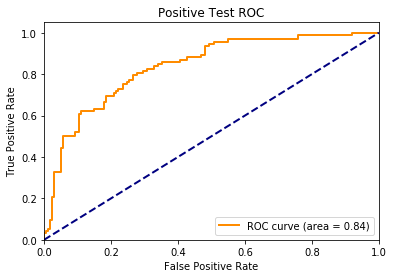

In [60]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Positive Test ROC')
plt.legend(loc="lower right")
plt.show()

In [61]:
print("loaded_model.self.classes_",loaded_model.classes_)
delta_range=[-.02, 0, 0.02, 0.04, 0.06, 0.08, .10, .12]
i=0
sensitivity_tpr=[0.0] * len(delta_range)
specificity_tnr=[0.0] * len(delta_range)
for delta in delta_range:	
	probs=loaded_model.predict_proba(X_test)
	report = [[ins[0], ins[1], 1] if (ins[1] > (ins[0]+delta)) else [ins[0], ins[1], 0] for ins in probs]
	report_df = pandas.DataFrame(report, columns=['neg_prob','pos_prob','pred'])
	predictions = numpy.array(report_df.values)[:,2]
	tn, fp, fn, tp=confusion_matrix(Y_test, predictions).ravel()
	sensitivity_tpr[i]= float(tp)/(float(tp)+float(fn))
	specificity_tnr[i]= float(tn)/(float(tn)+float(fp))
	print("deltaX,sensitivity_tpr,specificity_tnr:", delta, sensitivity_tpr[i],specificity_tnr[i]) 
	#print("accuracy_score=",accuracy_score(Y_test, predictions))
	print("confusion_matrix: tn, fp, fn, tp:", tn, fp, fn, tp)
	#print(classification_report(Y_test, predictions))
	i=i+1

loaded_model.self.classes_ [0. 1.]
deltaX,sensitivity_tpr,specificity_tnr: -0.02 0.7717391304347826 0.7407407407407407
confusion_matrix: tn, fp, fn, tp: 120 42 21 71
deltaX,sensitivity_tpr,specificity_tnr: 0 0.7717391304347826 0.7469135802469136
confusion_matrix: tn, fp, fn, tp: 121 41 21 71
deltaX,sensitivity_tpr,specificity_tnr: 0.02 0.7608695652173914 0.7530864197530864
confusion_matrix: tn, fp, fn, tp: 122 40 22 70
deltaX,sensitivity_tpr,specificity_tnr: 0.04 0.75 0.7654320987654321
confusion_matrix: tn, fp, fn, tp: 124 38 23 69
deltaX,sensitivity_tpr,specificity_tnr: 0.06 0.7391304347826086 0.7654320987654321
confusion_matrix: tn, fp, fn, tp: 124 38 24 68
deltaX,sensitivity_tpr,specificity_tnr: 0.08 0.7282608695652174 0.7654320987654321
confusion_matrix: tn, fp, fn, tp: 124 38 25 67
deltaX,sensitivity_tpr,specificity_tnr: 0.1 0.7282608695652174 0.7716049382716049
confusion_matrix: tn, fp, fn, tp: 125 37 25 67
deltaX,sensitivity_tpr,specificity_tnr: 0.12 0.717391304347826 0.7777777

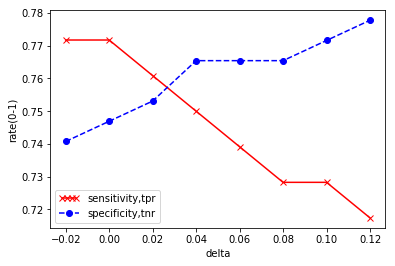

In [62]:
from matplotlib.legend_handler import HandlerLine2D

plt.clf()
pred_legend,=plt.plot(delta_range, sensitivity_tpr, 'r', marker='x', label="sensitivity,tpr") 
prob_legend,=plt.plot(delta_range, specificity_tnr, 'b', linestyle='--', marker='o', label="specificity,tnr")
plt.legend(handler_map={pred_legend: HandlerLine2D(numpoints=4)})
plt.xlabel('delta')
plt.ylabel('rate(0-1)')
plt.show()

In [63]:
delta=-0.10
print("cross-over of sensitivity and specificity lie at about delta=", delta)
report=[[ins[0], ins[1], 1] if (ins[1] > (ins[0]+delta)) else [ins[0], ins[1], 0] for ins in probs]
report_df=pandas.DataFrame(report, columns=['neg_prob','pos_prob','pred'])
predictions=numpy.array(report_df.values)[:,2]
positive_prob=numpy.array(report_df.values)[:,1]

cross-over of sensitivity and specificity lie at about delta= -0.1


In [64]:
print("accuracy_score=",accuracy_score(Y_test, predictions))
tn, fp, fn, tp=confusion_matrix(Y_test, predictions).ravel()
print("confusion_matrix: tn, fp, fn, tp:", tn, fp, fn, tp)
sensitivity_tpr= float(tp)/(float(tp)+float(fn))
specificity_tnr= float(tn)/(float(tn)+float(fp))
print("deltaX,sensitivity_tpr,specificity_tnr:", delta, sensitivity_tpr,specificity_tnr) 
print(classification_report(Y_test, predictions))

accuracy_score= 0.7362204724409449
confusion_matrix: tn, fp, fn, tp: 111 51 16 76
deltaX,sensitivity_tpr,specificity_tnr: -0.1 0.8260869565217391 0.6851851851851852
             precision    recall  f1-score   support

        0.0       0.87      0.69      0.77       162
        1.0       0.60      0.83      0.69        92

avg / total       0.77      0.74      0.74       254



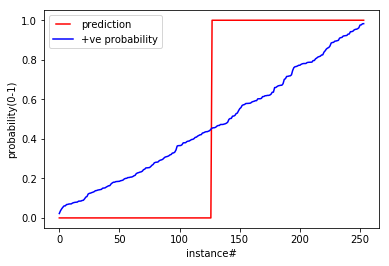

In [65]:
# sort instances by (a) class, and then (b) positive probability for plotting
report_df=report_df.sort_values(by=['pred','pos_prob'])
predictions=numpy.array(report_df.values)[:,2]
positive_prob=numpy.array(report_df.values)[:,1]

plt.clf()
pred_legend,=plt.plot(predictions, 'r', label="prediction") 
prob_legend,=plt.plot(positive_prob, 'b', label="+ve probability")

plt.legend(handler_map={pred_legend: HandlerLine2D(numpoints=4)})
plt.xlabel('instance#')
plt.ylabel('probability(0-1)')

plt.show()